# Regression

Shows how to train a simple neural network (multi-layer perceptron) to do regression. In this case, to predict housing prices, based on the [Boston housing data set](https://www.kaggle.com/c/boston-housing).


See [online tutorial](https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/).

In [3]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

seed = 42

Using TensorFlow backend.


# Load data

In [4]:
# load dataset
print(os.getcwd())
df = pd.read_csv('../data/housing.csv', sep='\t')
df.head()

/home/debacwa/Work/dl-keras-tutorial/notebooks


crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

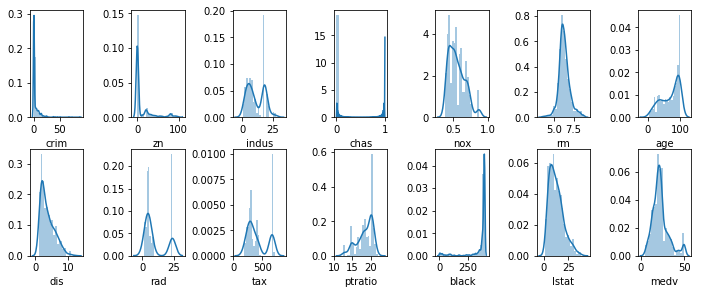

In [5]:
# plot distributions of the data
fig, ax = plt.subplots(nrows=2,ncols=7, figsize=(10,4))
fig.tight_layout()
ax = ax.flatten()
for i, colname in enumerate(df.columns):
    sns.distplot(df[colname],bins=20,ax=ax[i])
for j in range(len(ax)-i-1):
    ax[i+j+1].set_visible(False)

# Preprocess data

In [6]:
# ground truth prices are in last column 
Y = df['medv'].values
# remove that column
df2 = df.drop('medv', axis=1)
# rest is data
X = df2.values

# split training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.333, random_state=seed)

# Define neural network

In [28]:
# define the model
def MLP():
    # create model
    model = Sequential()
    model.add(Dense(24, input_dim=13, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(12, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(1, kernel_initializer='normal', activation='linear'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
    return model

model = MLP()
print(model.count_params())

649


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 24)                336       
_________________________________________________________________
dense_18 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 13        
Total params: 649
Trainable params: 649
Non-trainable params: 0
_________________________________________________________________


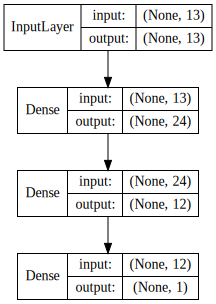

In [29]:
model.summary()

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model, show_shapes=True, show_layer_names=False).create(prog='dot', format='svg'))

# Train NN

In [30]:
history = model.fit(X_train, Y_train, 
                    batch_size=4, epochs=100, 
                    validation_data=[X_test, Y_test],
                    verbose=2)

Train on 337 samples, validate on 169 samples
Epoch 1/100
 - 0s - loss: 591.8280 - mean_squared_error: 591.8280 - val_loss: 491.8620 - val_mean_squared_error: 491.8620
Epoch 2/100
 - 0s - loss: 537.3597 - mean_squared_error: 537.3597 - val_loss: 439.1955 - val_mean_squared_error: 439.1955
Epoch 3/100
 - 0s - loss: 483.5841 - mean_squared_error: 483.5841 - val_loss: 392.0967 - val_mean_squared_error: 392.0967
Epoch 4/100
 - 0s - loss: 437.4723 - mean_squared_error: 437.4723 - val_loss: 352.8115 - val_mean_squared_error: 352.8115
Epoch 5/100
 - 0s - loss: 397.8019 - mean_squared_error: 397.8019 - val_loss: 318.6300 - val_mean_squared_error: 318.6300
Epoch 6/100
 - 0s - loss: 362.5256 - mean_squared_error: 362.5256 - val_loss: 288.3940 - val_mean_squared_error: 288.3940
Epoch 7/100
 - 0s - loss: 330.5861 - mean_squared_error: 330.5861 - val_loss: 260.9867 - val_mean_squared_error: 260.9867
Epoch 8/100
 - 0s - loss: 302.1292 - mean_squared_error: 302.1292 - val_loss: 236.8154 - val_mean_sq

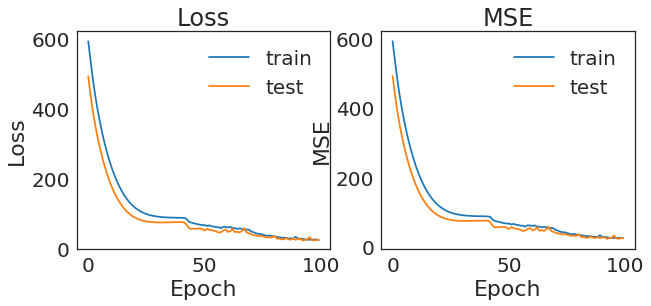

In [31]:
def plot_history(history, validation=False):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4), sharex=True)
    #fig.tight_layout()
    # plot history for loss
    ax[0].plot(history.history['loss'])
    if validation:
        ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_ylim(bottom=0.)
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['train', 'test'])
    
    # plot history for F score etc.
    ax[1].plot(history.history['mean_squared_error'])
    if validation:
        ax[1].plot(history.history['val_mean_squared_error'])
    ax[1].set_title('MSE')
    ax[1].set_ylabel('MSE')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['train', 'test'])

plot_history(history, validation=True)

# Evaluate and predict

In [33]:
model.evaluate(X_test, Y_test)

169/169 [==============================] - 0s 27us/step


[25.047485848150309, 25.047485848150309]

Text(0,0.5,'Prediction')

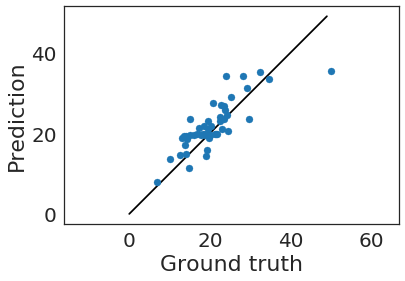

In [32]:
result = dict()
for i in range(50):
    sample = i
    sample_x = X_test[sample]
    sample_x = np.expand_dims(sample_x, 0)
    gt_y = Y_test[sample]
    pred_y = model.predict(sample_x)
    result[gt_y] = pred_y[0,0]
    #print('Prediction: {:.3f} GT: {:.3f}, Error: {:.3f}'.format(pred_y[0,0], gt_y, abs(pred_y[0,0]-gt_y)))

# plot prediction vs ground truth
sns.set_style('white')
sns.set_context('notebook', font_scale=2.0)
plt.plot(range(50), range(50), c='black', zorder=0)
plt.scatter(list(result.keys()), list(result.values()))
plt.axis('equal')
plt.xlabel('Ground truth')
plt.ylabel('Prediction')